# Artificial matrix study

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '61a67e487f088b762b8239174b05db2afc675d23'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

#### Load libraries

In [3]:
from network import BCPNNFast, NetworkManager
from plotting_functions import plot_winning_pattern
from analysis_functions import calculate_recall_success, calculate_timings
from analysis_functions import create_artificial_matrix
from plotting_functions import plot_weight_matrix, plot_network_activity_angle

## A simple example

In [48]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 2
decay_factor = 0.1
diagonal_zero = True
sequence_decay = 0.99
diagonal_across = True
diagonal_value = 1.01
inhibition = -1.0
w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value, sequence_decay=sequence_decay)
w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                         0, diagonal_zero, diagonal_across, diagonal_value)

# Create the network
nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
nn.w = w
nn.w_ampa = w_ampa
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
manager.stored_patterns_indexes = patterns_indexes
manager.n_patterns = number_of_patterns

#### Weight matrices

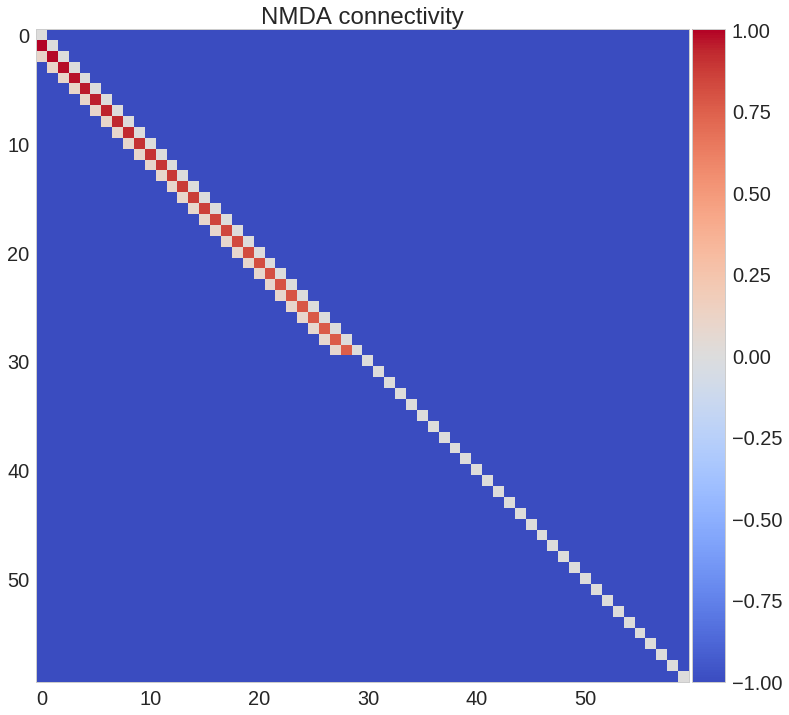

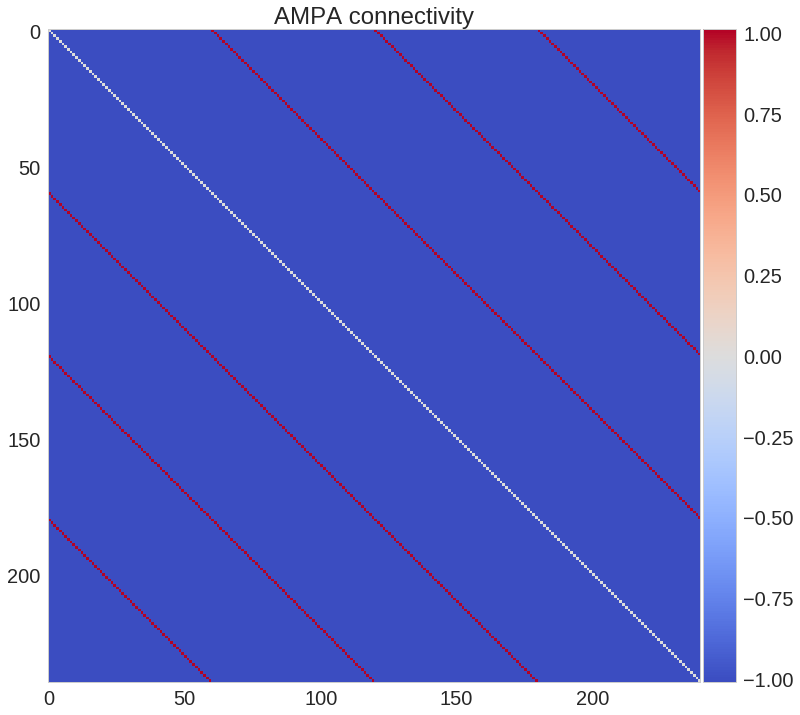

In [49]:
plot_weight_matrix(nn, ampa=False, one_hypercolum=True)
plot_weight_matrix(nn, ampa=True)

### Recall
T_cue = 0.100
I_cue = 0
T_recall = 10.0
manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)
plot_winning_pattern(manager)

#### Recall time

In [12]:
timings = calculate_timings(manager)
timings = [timings[index][1] for index in patterns_indexes]

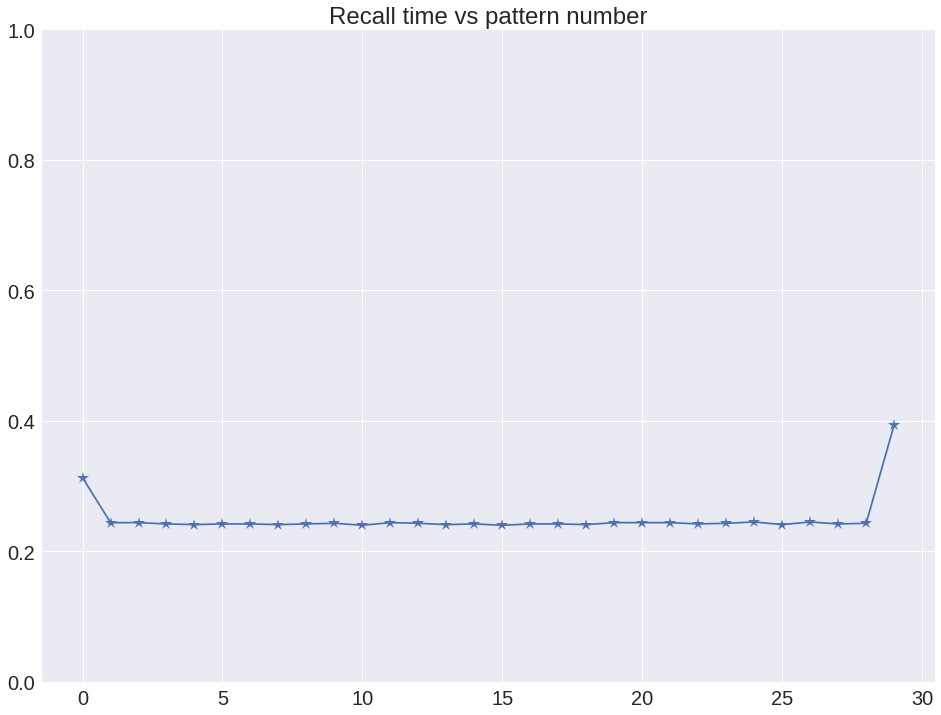

In [19]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(patterns_indexes, timings, '*-', markersize=13)
ax.set_title('Recall time vs pattern number')
ax.set_ylabel('Recall times')
ax.set_xlabel('Pattern number')
ax.set_ylim([0, 1.0]);

## Sequence intensity decay

In [40]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 40
patterns_indexes = [i for i in range(number_of_patterns)]



In [32]:
# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.5
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 20.0
sequence_decay_ranges = np.arange(0.5, 1.1, 0.05)
recall_times_sequence = []

In [33]:
for sequence_decay in sequence_decay_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value, sequence_decay=sequence_decay)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes]
    recall_times_sequence.append(timings)

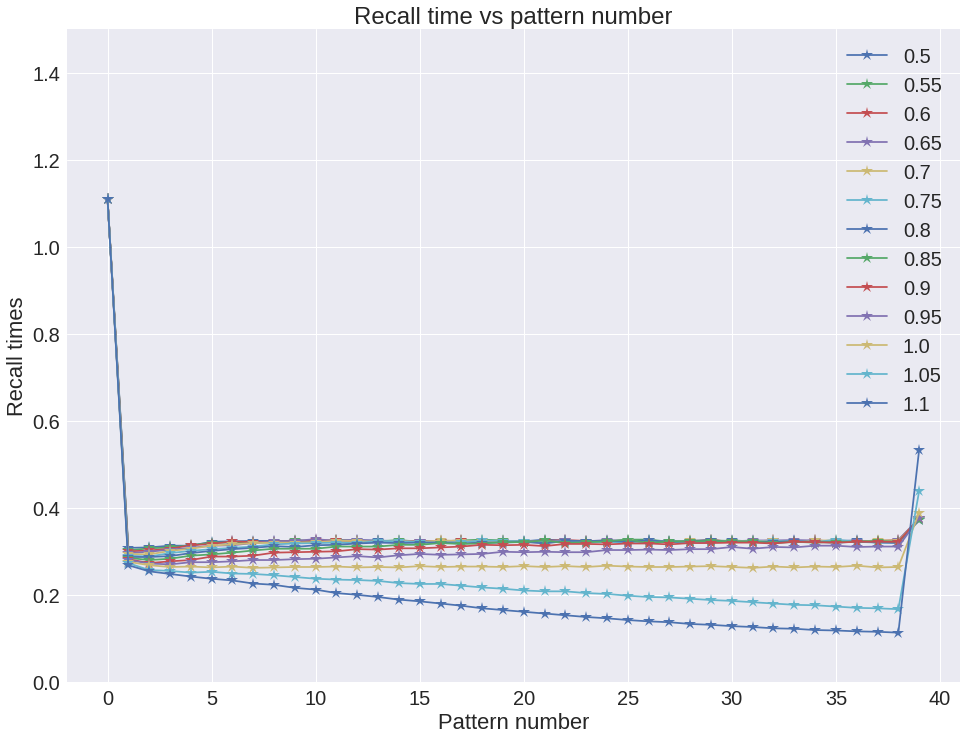

In [41]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
for index, timings in enumerate(recall_times_sequence):
    ax.plot(patterns_indexes, timings, '*-', markersize=13, label=str(sequence_decay_ranges[index]))

ax.legend()
ax.set_ylabel('Recall times')
ax.set_xlabel('Pattern number')
ax.set_title('Recall time vs pattern number')
ax.set_ylim([0, 1.5]);

## Weight intensity variation

In [39]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.1
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 10.0
value_ranges = np.logspace(-2, 2, 20)
mean_recall_time = []
std_recall_time = []

In [40]:
for value in value_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

(0, 1.0)

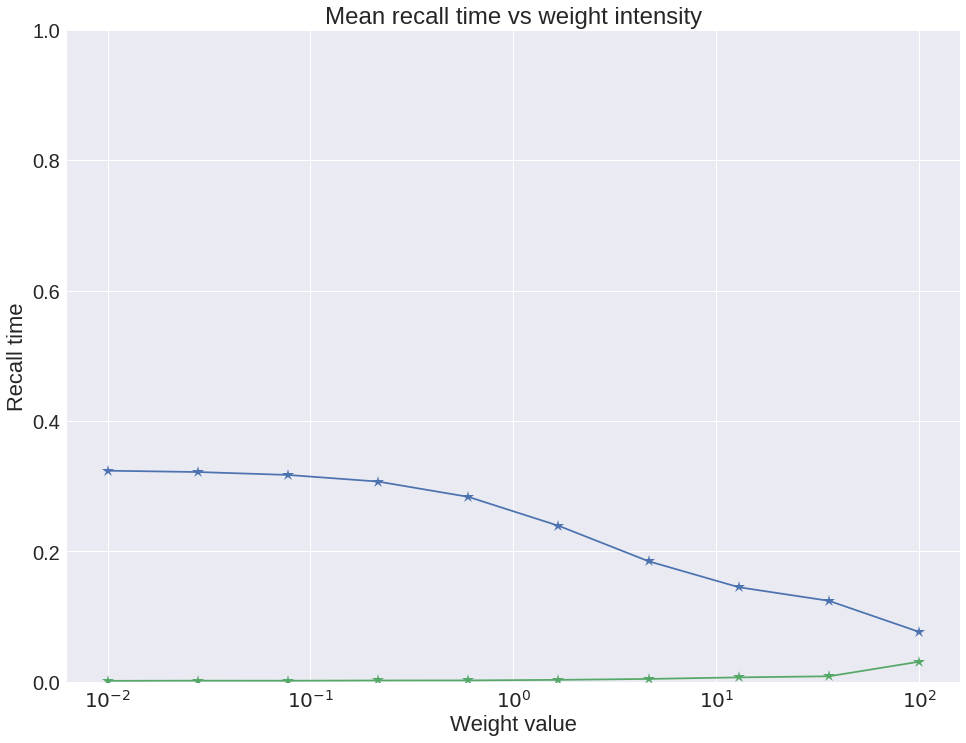

In [42]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(value_ranges, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(value_ranges, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs weight intensity')
ax.set_xlabel('Weight value')
ax.set_ylabel('Recall time')
ax.set_xscale('log')
ax.set_ylim([0, 1.0])

ax.legend();

### Turning diagonal effects for AMPA

In [50]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.1
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 10.0
value_ranges = np.logspace(-2, 2, 20)
mean_recall_time = []
std_recall_time = []

In [51]:
for value in value_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, False, diagonal_value)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

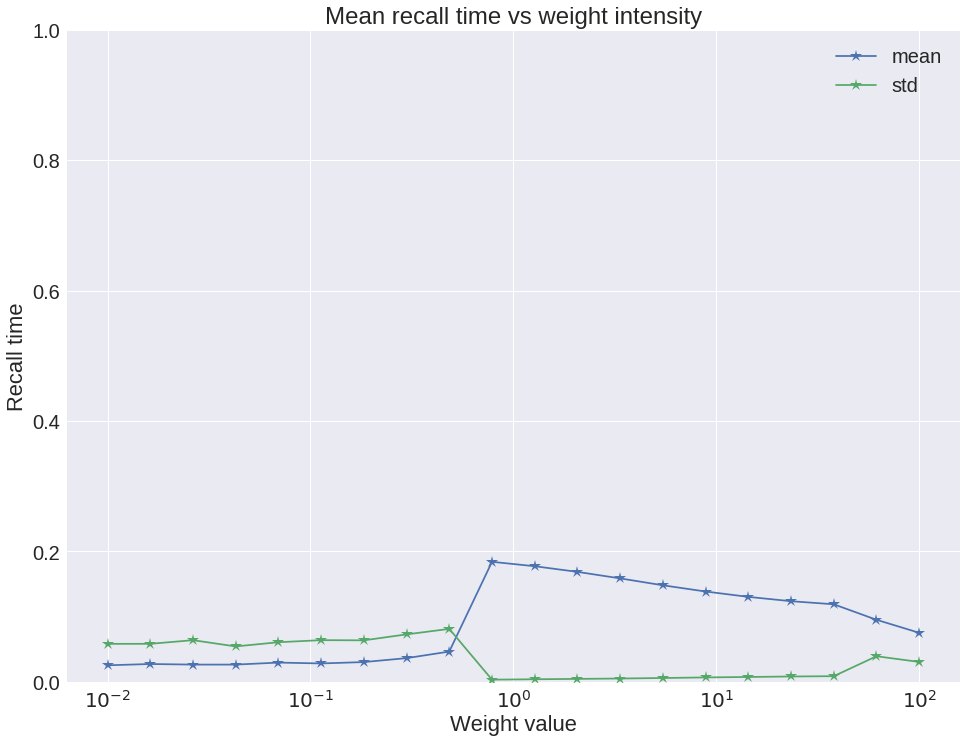

In [52]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(value_ranges, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(value_ranges, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs weight intensity')
ax.set_xlabel('Weight value')
ax.set_ylabel('Recall time')
ax.set_xscale('log')
ax.set_ylim([0, 1.0])

ax.legend();

## Inhibition strength

In [77]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.1
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 150
inhibition_ranges = -1 * np.logspace(-2, 1.0, 15)
mean_recall_time = []
std_recall_time = []

In [78]:
for inhibition in inhibition_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

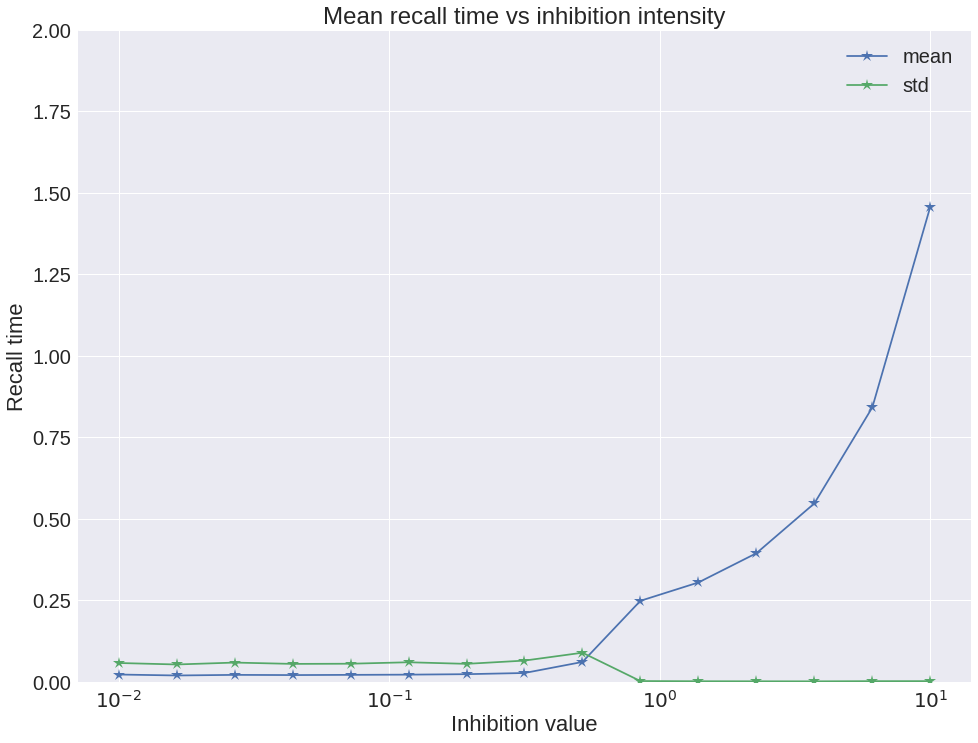

In [85]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(-inhibition_ranges, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(-inhibition_ranges, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs inhibition intensity')
ax.set_xlabel('Inhibition value')
ax.set_ylabel('Recall time')
ax.set_ylim([0, 2.0])
ax.set_xscale('log')

ax.legend();

### Differences in extension

In [89]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.3
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 10.0
extension_range = np.arange(1, 5, 1)
mean_recall_time = []
std_recall_time = []

In [90]:
for extension in extension_range:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

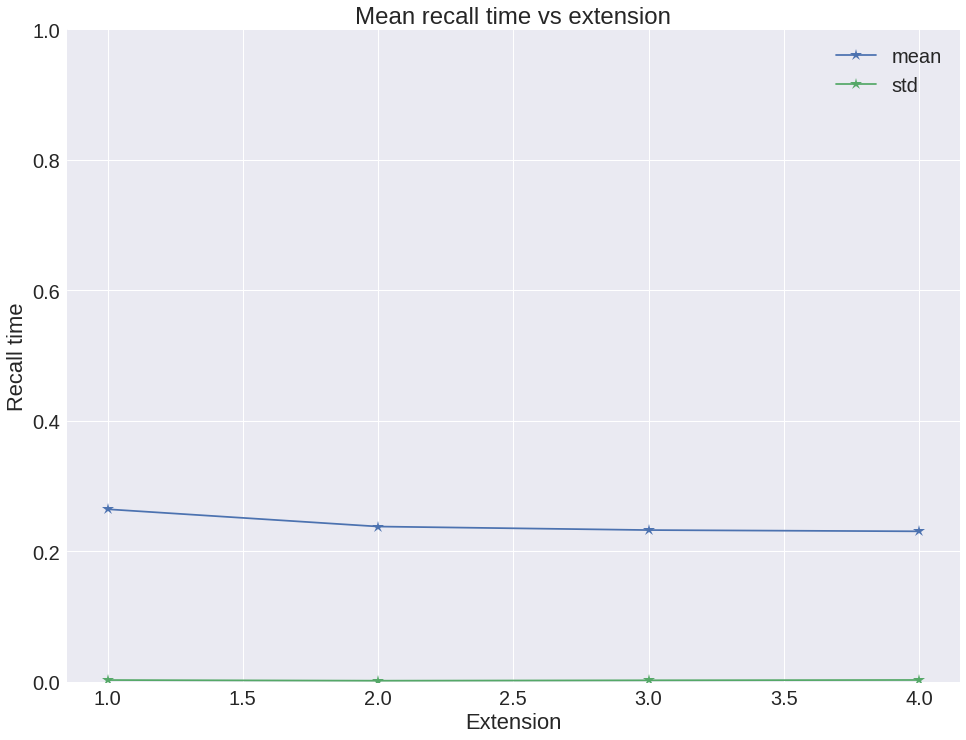

In [91]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(extension_range, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(extension_range, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs extension')
ax.set_xlabel('Extension')
ax.set_ylabel('Recall time')
ax.set_ylim([0, 1.0])

ax.legend();

#### Diagonal values

In [53]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.5
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 20.0
diagonal_ranges = np.arange(0.5, 1.5, 0.1)
mean_recall_time = []
std_recall_time = []

In [54]:
for diagonal_value in diagonal_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

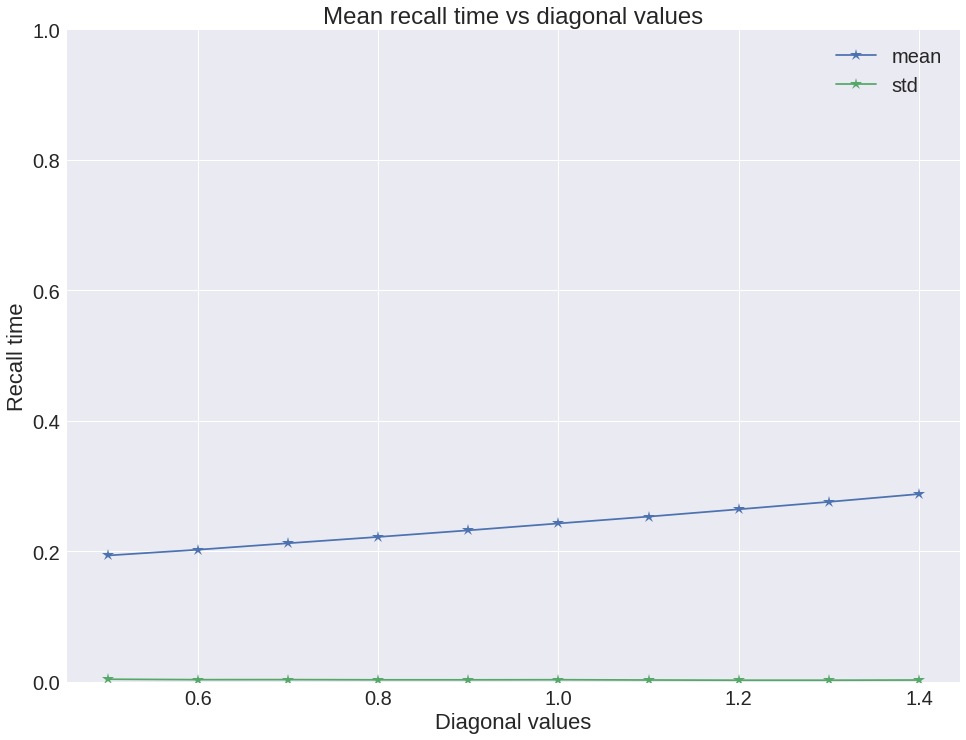

In [55]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(diagonal_ranges, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(diagonal_ranges, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs diagonal values')
ax.set_xlabel('Diagonal values')
ax.set_ylabel('Recall time')
ax.set_ylim([0, 1.0])

ax.legend();

## Include free attractor

In [4]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.1
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1
sequence_decay = 1.0
free_attractor = True
free_attractor_value = 0.5

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 10.0
value_ranges = np.logspace(-2, 2, 20)
mean_recall_time = []
std_recall_time = []

In [5]:
for value in value_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value, sequence_decay=sequence_decay,
                             free_attractor=free_attractor, free_attractor_value=free_attractor_value)

    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                                  0, diagonal_zero, diagonal_across, diagonal_value,
                                  free_attractor=free_attractor, free_attractor_value=free_attractor_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

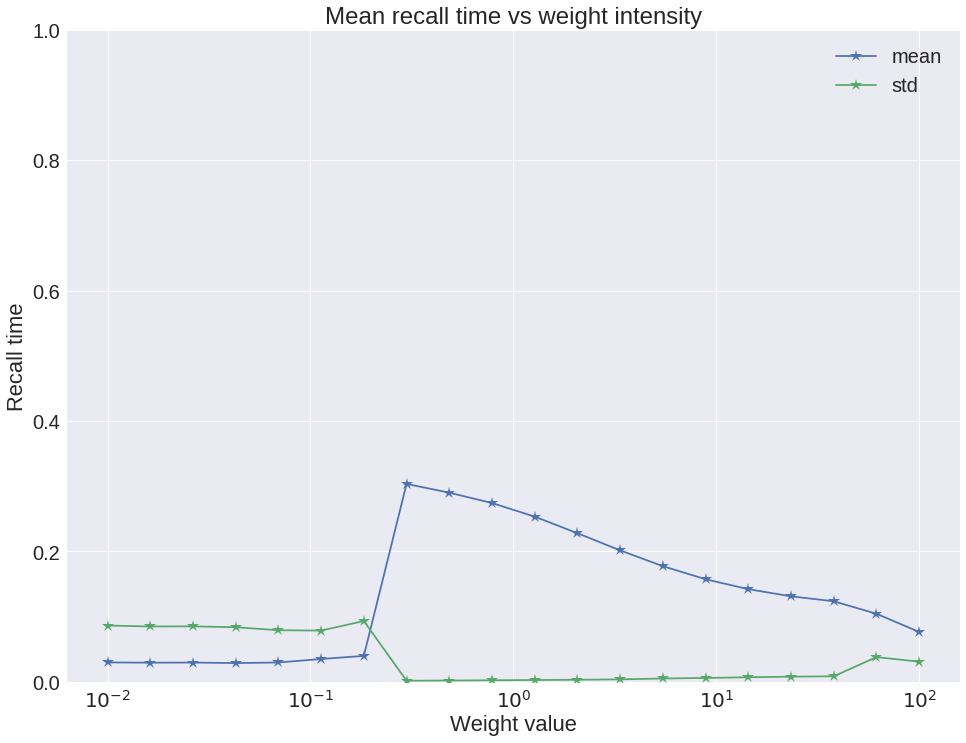

In [6]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(value_ranges, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(value_ranges, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs weight intensity')
ax.set_xlabel('Weight value')
ax.set_ylabel('Recall time')
ax.set_xscale('log')
ax.set_ylim([0, 1.0])

ax.legend();